<a href="https://colab.research.google.com/github/kaiquefreire05/car-prices-prediction-regression/blob/main/car_prices_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importação e leitura da base dados

In [588]:
# Importações necessárias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

from sklearn.metrics import mean_absolute_error

In [589]:
# Lendo a base de dados

df = pd.read_csv('/content/drive/MyDrive/datasets/CarPricesPrediction.csv')

# Visualização da base de dados

In [590]:
# Visualizando os 5 primeiros registros

df.head()

,Unnamed: 0,Make,Model,Year,Mileage,Condition,Price
0,0,Ford,Silverado,2022,18107,Excellent,19094.75
1,1,Toyota,Silverado,2014,13578,Excellent,27321.10
2,2,Chevrolet,Civic,2016,46054,Good,23697.30
3,3,Ford,Civic,2022,34981,Excellent,18251.05
4,4,Chevrolet,Civic,2019,63565,Excellent,19821.85


In [591]:
# Verificando os 5 últimos registros

df.tail()

,Unnamed: 0,Make,Model,Year,Mileage,Condition,Price
995,995,Nissan,Camry,2010,149032,Excellent,24548.50
996,996,Chevrolet,F-150,2014,20608,Excellent,26969.70
997,997,Ford,Altima,2016,109851,Good,20507.55
998,998,Toyota,Silverado,2010,11704,Good,31414.90
999,999,Nissan,Silverado,2017,128390,Excellent,18580.60


In [592]:
# Informação sobre a tabela

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1000 non-null   int64  
 1   Make        1000 non-null   object 
 2   Model       1000 non-null   object 
 3   Year        1000 non-null   int64  
 4   Mileage     1000 non-null   int64  
 5   Condition   1000 non-null   object 
 6   Price       1000 non-null   float64
dtypes: float64(1), int64(3), object(3)
memory usage: 54.8+ KB


In [593]:
# Breve descrição da tabela

df.describe()

,Unnamed: 0,Year,Mileage,Price
count,1000.000000,1000.00000,1000.000000,1000.000000
mean,499.500000,2015.86500,78796.927000,22195.205650
std,288.819436,3.78247,39842.259941,4245.191585
min,0.000000,2010.00000,10079.000000,12613.000000
25%,249.750000,2013.00000,44942.750000,18961.862500
50%,499.500000,2016.00000,78056.500000,22247.875000
75%,749.250000,2019.00000,112366.250000,25510.275000
max,999.000000,2022.00000,149794.000000,31414.900000


In [594]:
# Fazendo a soma dos valores nulos

df.isnull().sum()

Unnamed: 0    0
Make          0
Model         0
Year          0
Mileage       0
Condition     0
Price         0
dtype: int64

# Gráficos para análise

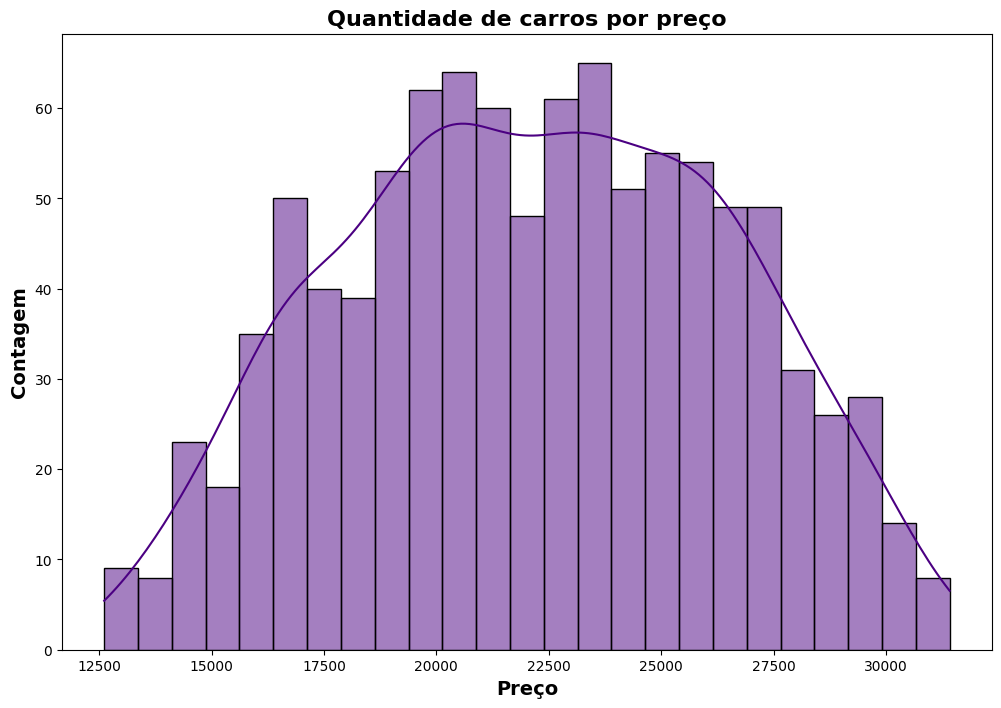

In [595]:
# Distribuição de preço

plt.figure(figsize= (12, 8))
sns.histplot(df['Price'], kde= True, bins= 25, color='indigo') #bins= número de barras
plt.title('Quantidade de carros por preço', fontsize= 16, fontweight= 'bold')
plt.xlabel('Preço', fontsize= 14, fontweight= 'bold')
plt.ylabel('Contagem', fontsize= 14, fontweight= 'bold')
plt.show();

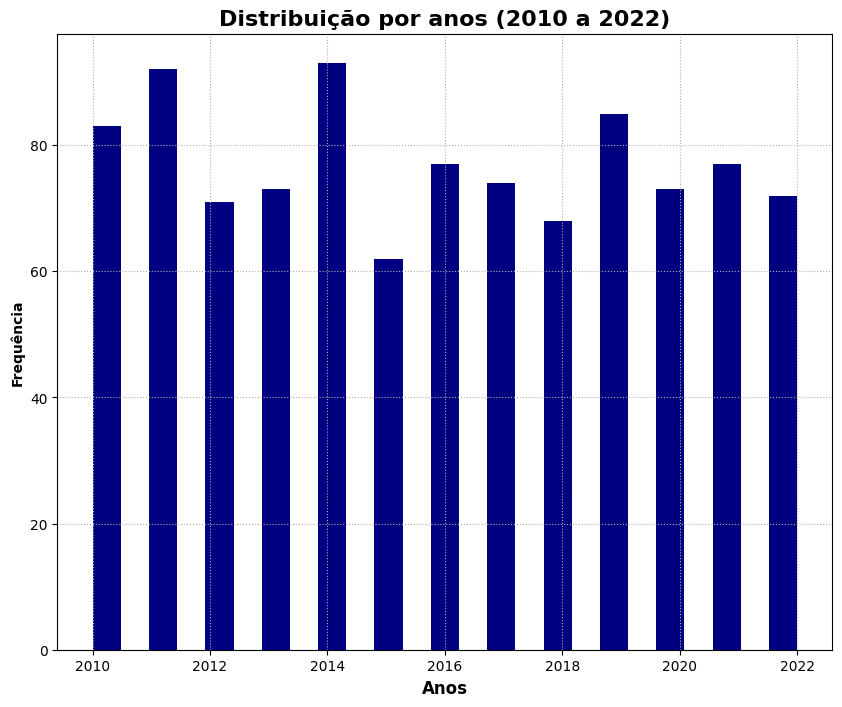

In [596]:
# Distribuição por anos

plt.figure(figsize=(10, 8)) # criando e definindo o tamanho da figura
df['Year'].plot(kind='hist', bins=25, color= 'navy') # frequência da coluna 'year' e definindo cor
plt.title('Distribuição por anos (2010 a 2022)', fontsize= 16, fontweight='bold') # título
plt.grid(True, linestyle=':') # linha de divisão do gráfico
plt.ylabel('Frequência', fontweight= 'bold') # legenda y
plt.xlabel('Anos', fontweight= 'bold', fontsize= 12) # legenda x
plt.show(); # plotando o gráfico

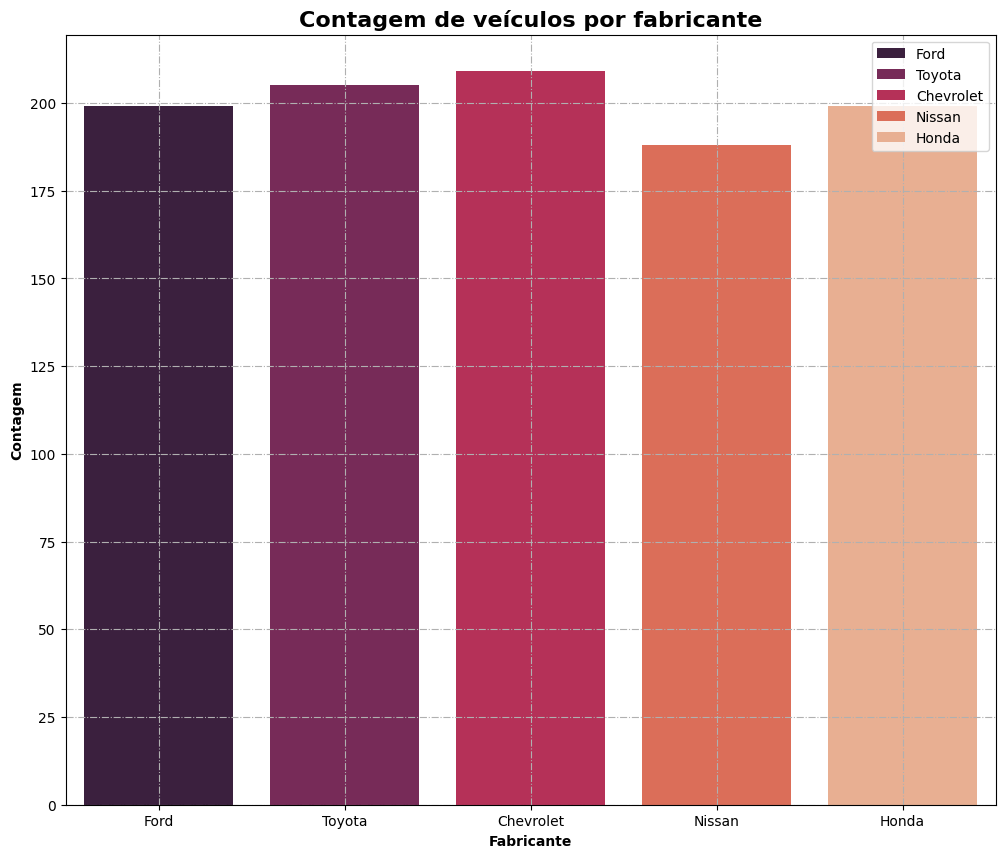

In [597]:
# Condição dos veículos

plt.figure(figsize=(12, 10)) # criando e definindo o tamanho da figura
sns.countplot(data=df, x='Make', hue='Make', palette='rocket') # passando o dataframe, coluna e paleta de cores
plt.title('Contagem de veículos por fabricante', fontsize=16, fontweight='bold') # título
plt.xlabel('Fabricante', fontsize=10, fontweight='bold') # legenda x
plt.ylabel('Contagem', fontsize=10, fontweight='bold') # legenda y
plt.legend(labels=['Ford', 'Toyota', 'Chevrolet', 'Nissan', 'Honda'], loc='upper right')  # Adiciona legenda
plt.grid(True, linestyle='-.') # exibindo e mostrando estilo do grid
plt.show(); # plotando a figura

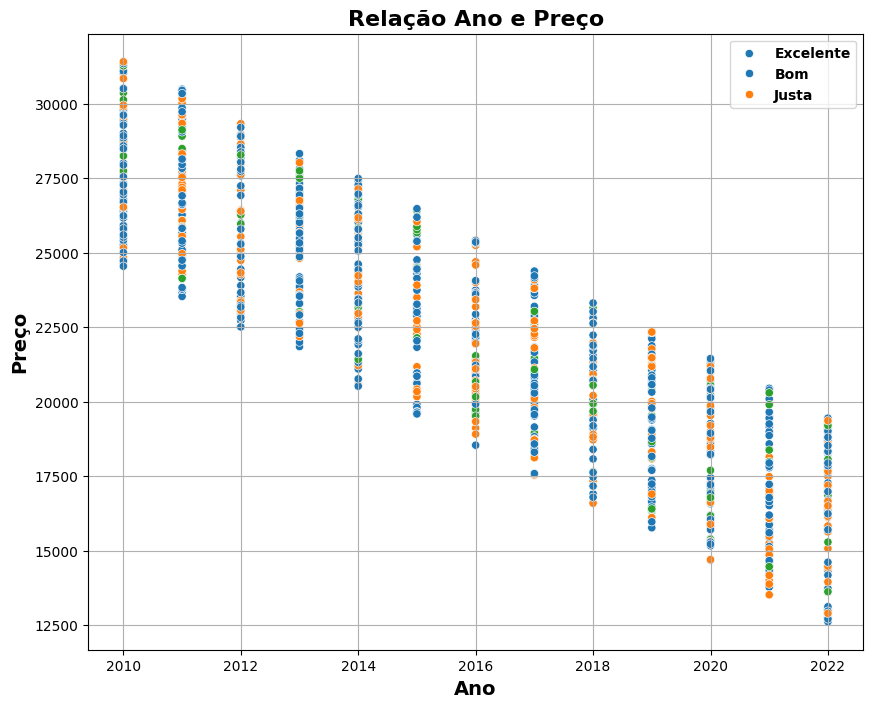

In [598]:
# Gráfico scatter, Ano x Year, adicional = condição

plt.figure(figsize= (10, 8)) # criando e definindo tamanho da figura
sns.scatterplot(data=df, x='Year', y='Price', hue='Condition') # passando os parâmetros de visualização e comparação
plt.title('Relação Ano e Preço', fontsize = 16, fontweight= 'bold') # título
plt.xlabel('Ano', fontsize= 14, fontweight= 'bold') # legenda x
plt.ylabel('Preço', fontsize= 14, fontweight= 'bold') # legenda y
plt.legend(labels=['Excelente', 'Bom', 'Justa'], loc='upper right', fontsize= 'medium', prop={'weight':'bold'}) # legenda das condições
plt.grid(True, linestyle= '-') # mostrando e alterando estilo da figura
plt.show() # plotando o gráfico

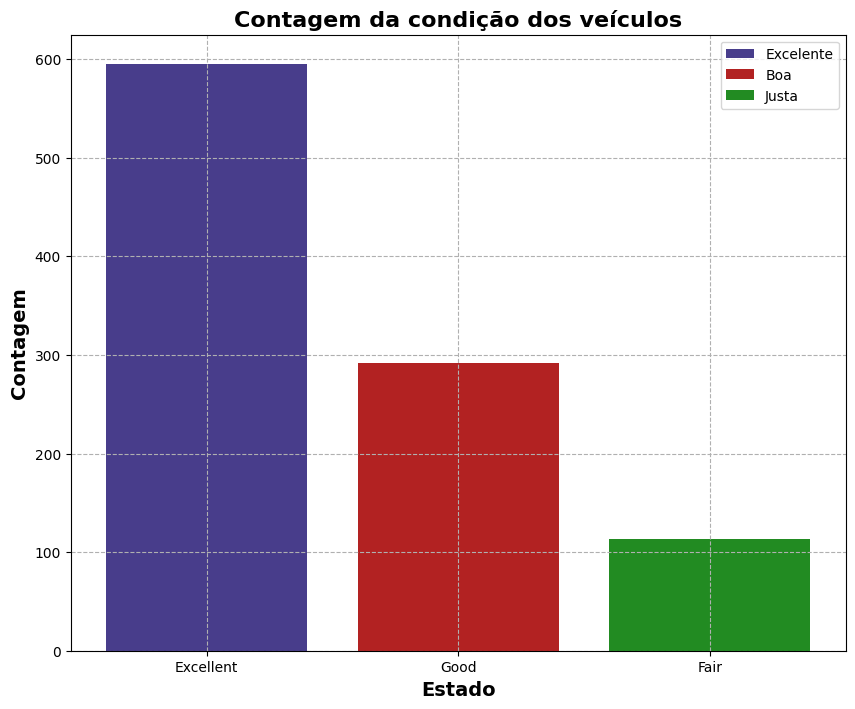

In [599]:
# Contagem da condição dos veículos

contagem = df['Condition'].value_counts() # variável que recebe a contagem da condição dos veículos
cores = ['darkslateblue', 'firebrick', 'forestgreen'] # cores das barras


fig, ax = plt.subplots(figsize=(10, 8)) # criando a figura
barras = ax.bar(contagem.index, contagem, color=cores) # criando as barras
plt.title('Contagem da condição dos veículos', fontsize=16, fontweight='bold')
plt.xlabel('Estado', fontsize=14, fontweight='bold') # legenda x
plt.ylabel('Contagem', fontsize=14, fontweight='bold') # legenda y
legendas = ['Excelente', 'Boa', 'Justa'] # legendas da descrição
plt.legend(barras, legendas, loc='upper right', fontsize='medium') # descrição
plt.grid(True, linestyle='--') # mostrando e defindo estilo do grid
plt.show(); # plotando a figura

# Pré-processamento

In [600]:
# Dropando coluna desnecessária

df.drop("Unnamed: 0", axis = 1, inplace=True) # removendo a coluna, diretamente na base de dados
df.head(2)

,Make,Model,Year,Mileage,Condition,Price
0,Ford,Silverado,2022,18107,Excellent,19094.75
1,Toyota,Silverado,2014,13578,Excellent,27321.10


In [601]:
# Dividindo previsores e classe

x = df.drop(['Price'], axis= 1)
y = df['Price']

In [602]:
# Obtendo as colunas categoricas

categorical_column_names = list(df.select_dtypes(include=['category', 'object']).columns)
# lista de valores contém apenas variáveis do tipo 'category' e 'object'
categorical_column_names

['Make', 'Model', 'Condition']

In [603]:
# Transformando as colunas usando o OneHotEncoder e ColumnTransformer

ohe_cp = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), categorical_column_names)], remainder='passthrough')
x_encoded = ohe_cp.fit_transform(x)
x_encoded

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.02200e+03, 1.81070e+04],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.01400e+03, 1.35780e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        2.01600e+03, 4.60540e+04],
       ...,
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        2.01600e+03, 1.09851e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        2.01000e+03, 1.17040e+04],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.01700e+03, 1.28390e+05]])

In [604]:
# Padronizando os valores usando o LabelEncoder

scaler = StandardScaler()
x_final = scaler.fit_transform(x_encoded)
x_final

array([[-0.51402578,  2.00627157, -0.49843701, ..., -0.64220665,
         1.62276745, -1.52401733],
       [-0.51402578, -0.49843701, -0.49843701, ..., -0.64220665,
        -0.49331073, -1.63774748],
       [ 1.94542772, -0.49843701, -0.49843701, ...,  1.55713119,
         0.03570882, -0.82222522],
       ...,
       [-0.51402578,  2.00627157, -0.49843701, ...,  1.55713119,
         0.03570882,  0.7798155 ],
       [-0.51402578, -0.49843701, -0.49843701, ...,  1.55713119,
        -1.55134981, -1.6848065 ],
       [-0.51402578, -0.49843701, -0.49843701, ..., -0.64220665,
         0.30021859,  1.24535828]])

In [605]:
# Dividindo entre base de treinamento e teste

x_train, x_test, y_train, y_test = train_test_split(x_final, y, test_size= 0.2, random_state= 1)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(800, 15) (800,)
(200, 15) (200,)


# Função para buscar os melhores parâmetros

In [606]:
# Função de busca para buscar os melhores parâmetros

def training_model_randomized(modelo, x_train, y_train, param_dist):
    """Trains a machine learning model using RandomizedSearchCV and returns score and the best parameters.
    Args:
        model: The machine learning model to be trained.
        x_train: The training data (features).
        y_train: The training labels (targets).
        param_dist: A dictionary containing the parameters to be tested with RandomizedSearchCV.

    Returns:
        A dictionary containing:
            'score': The best score obtained during training.
            'parametros': The best parameters found by RandomizedSearchCV.
    """
    randomized_search = RandomizedSearchCV(modelo, param_dist)
    randomized_search.fit(x_train, y_train)
    return {'score': randomized_search.best_score_, 'parametros': randomized_search.best_params_}

In [607]:
# Lista que acumula os valores da média absoluta de erro

mae_values = []

# LinearRegression

In [608]:
# Buscando os melhores parâmetros e score da LinearRegression

param_grid_linear = { # diconário de parâmetros
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'n_jobs': [-1, None],
    'positive': [True, False]
}

resultado_treino_linear = training_model_randomized(modelo=LinearRegression(), x_train=x_train, y_train=y_train, param_dist=param_grid_linear) # buscando melhores parâmetros e score
best_params_linear = resultado_treino_linear['parametros'] # atribuindo a variável o dicionário de retorno da função

# dando print nos resultados
print(f'O melhor score em base de teste foi: {resultado_treino_linear["score"]}')
print(f'Os melhores para foram: {best_params_linear}')

O melhor score em base de teste foi: 0.9999999997506464
Os melhores para foram: {'positive': False, 'n_jobs': -1, 'fit_intercept': True, 'copy_X': False}


In [609]:
# Criando e treinando modelo

linear_regression = LinearRegression() # criando modelo
linear_regression.set_params(**best_params_linear) # passando os melhores parâmetros
linear_regression.fit(x_train, y_train) # fazendo fit com a base de treino

LinearRegression(copy_X=False, n_jobs=-1)

In [610]:
# Visualizando o score com as variáveis de teste e treinamento

print(f'O score na base de teste é: {linear_regression.score(x_test, y_test)}')
print(f'O score na base de treinamento é: {linear_regression.score(x_train, y_train)}')

O score na base de teste é: 0.9998076105361023
O score na base de treinamento é: 0.9999999997630118


In [611]:
# Fazendo previsão

previsao_linear = linear_regression.predict(x_test)

In [612]:
# Média de erro absoluto

mae_linear = mean_absolute_error(y_test, previsao_linear)
mae_values.append(mae_linear) # adicionando a lista que armazena a MAE
mae_values

[57.420348111669945]

# Random Forests Regressor

In [613]:
# Buscando os melhores parâmetros e score do algoritmo de RandomForest

params_rf = { # dicionário de parâmetros para random forest
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'random_state': [42]
}

resultado_treino_rfr = training_model_randomized(modelo= RandomForestRegressor(), x_train= x_train, y_train= y_train, param_dist= params_rf) # buscando melhores parâmetros e score
best_params_rf = resultado_treino_rfr["parametros"] # variável que recebe os melhores parâmetros

# printando score e parâmetros da variável
print(f'O melhor score em base de teste foi: {resultado_treino_rfr["score"]}')
print(f'Os melhores para foram: {best_params_rf}')

O melhor score em base de teste foi: 0.9982828869038107
Os melhores para foram: {'random_state': 42, 'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 10, 'bootstrap': True}


In [614]:
# Criando e treinamento modelo

rf_regressor = RandomForestRegressor()
rf_regressor.set_params(**best_params_rf)
rf_regressor.fit(x_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=200, random_state=42)

In [615]:
# Verificando score na base de teste e treinamento

print(f'O score do algoritmo na base de teste é: {rf_regressor.score(x_test, y_test)}')
print(f'O score do algoritmo na base de treinamento é: {rf_regressor.score(x_train, y_train)}')

O score do algoritmo na base de teste é: 0.998808916428388
O score do algoritmo na base de treinamento é: 0.9998688721100638


In [616]:
# Fazendo as previsões e calculando a média de erro absoluto

previsoes_rfr = rf_regressor.predict(x_test)
mae_rfr = mean_absolute_error(y_test, previsoes_rfr)
mae_values.append(mae_rfr) # adicionando na lista que armazena os valores de MAE

# Support Vector Machine (SVM) Regression

In [617]:
# Buscando os melhores parametros e score do algoritmo SVM

grid_param_svm = { # dicionário de parâmetros
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # tipo de kernel a ser utilizado
    'C': [0.1, 1, 10, 100],  # parâmetro de regularização
    'epsilon': [0.1, 0.2, 0.5, 0.3],  # parâmetro de largura da margem
    'gamma': ['scale', 'auto']  # coeficiente para 'rbf', 'poly' e 'sigmoid'
}

resultados_treino_svm = training_model_randomized(modelo= SVR(), x_train= x_train, y_train= y_train, param_dist= grid_param_svm) # obtendo melhores parâmetros e score usando a função
best_params_svm = resultados_treino_svm['parametros'] # atribuindo a uma variáve; o dicionário de parâmetros

# printando os resultados
print(f'O melhor score do algotimo svm foi de: {resultados_treino_svm["score"]}')
print(f'Os melhores parâmetros foram: {best_params_svm}')

O melhor score do algotimo svm foi de: 0.9420431073902631
Os melhores parâmetros foram: {'kernel': 'sigmoid', 'gamma': 'scale', 'epsilon': 0.3, 'C': 100}


In [618]:
# Criando o modelo, passando parâmetros e fazendo o treinamento

svm_regressor = SVR() # criando o modelo
svm_regressor.set_params(**best_params_svm) # passando os melhores parâmetros obtidos
svm_regressor.fit(x_train, y_train) # fazendo o treinamento

SVR(C=100, epsilon=0.3, kernel='sigmoid')

In [619]:
# Vendo o score na base de teste e treinamento

print(f'O score do algoritmo na base de teste é: {svm_regressor.score(x_test, y_test)}')
print(f'O score do algoritmo na base de treinamento é de: {svm_regressor.score(x_train, y_train)}')

O score do algoritmo na base de teste é: 0.9935127532993023
O score do algoritmo na base de treinamento é de: 0.993501601355508


In [620]:
# Fazendo previsão, calculando MAE e adicionando valor na lista

previsao_svm = svm_regressor.predict(x_test) # prevendo
mae_svm = mean_absolute_error(y_test, previsao_svm) # calculando o mae
mae_values.append(mae_svm) # colocar o valor na lista
mae_values

[57.420348111669945, 96.09903912647742, 276.53627065408676]

# Rede Neural Artificial

In [ ]:
# Buscando os melhores parâmetros

rn_param_grid = { # dicionário de parâmetros
    'hidden_layer_sizes': [(50,),(100,),(50,50),(100,50,25)],  # configurações diferentes de camadas ocultas e neurônios
    'activation': ['relu', 'tanh', 'logistic'],  # função de ativação
    'solver': ['lbfgs', 'adam', 'sgd'],  # otimizador
    'alpha': [0.0001, 0.001, 0.01],  # parâmetro de regularização
    'learning_rate': ['constant', 'invscaling', 'adaptive'],  # taxa de aprendizado
    'learning_rate_init': [0.001, 0.01, 0.1],  # taxa de aprendizado inicial
    'max_iter': [1000, 1200, 1500],  # número máximo de iterações
    'batch_size': [32, 64, 128],  # tamanho do lote
    'early_stopping': [True, False],  # se usar ou não parada antecipada
    'validation_fraction': [0.1, 0.2, 0.3]  # fração dos dados de treinamento para validação
}

resultado_treino_rn = training_model_randomized(modelo= MLPRegressor(), x_train= x_train, y_train= y_train, param_dist= rn_param_grid) # obtendo os melhores parâmetros
best_params_rn = resultado_treino_rn['parametros'] # atribuindo o dicionário dos mehores parâmetros na variável

In [622]:
# Printando o melhor resultado e parâmetros


print(f'O melhor score foi de: {resultado_treino_rn["score"]}')
print(f'OS melhores parâmetros são: {best_params_rn}')

O melhor score foi de: 0.9994314173122456
OS melhores parâmetros são: {'validation_fraction': 0.3, 'solver': 'lbfgs', 'max_iter': 1500, 'learning_rate_init': 0.1, 'learning_rate': 'constant', 'hidden_layer_sizes': (50, 50), 'early_stopping': False, 'batch_size': 128, 'alpha': 0.01, 'activation': 'relu'}


In [623]:
# Criando modelo, passando melhores parâmetros e fazendo o treinamento

rn_model = MLPRegressor() # criando o modelo
rn_model.set_params(**best_params_rn) # atribuindo os melhores parâmetros
rn_model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPRegressor(alpha=0.01, batch_size=128, hidden_layer_sizes=(50, 50),
             learning_rate_init=0.1, max_iter=1500, solver='lbfgs',
             validation_fraction=0.3)

In [624]:
# Printando o score na base de treino e teste

print(f'O score do algoritmo na base de teste é: {rn_model.score(x_test, y_test)}')
print(f'O score do algoritmo na base de treinamento é: {rn_model.score(x_train, y_train)}')

O score do algoritmo na base de teste é: 0.9995795646020623
O score do algoritmo na base de treinamento é: 0.9999989299445509


In [625]:
# Fazendo previsão e calculando a média de erro absoluta

previsao_rn = rn_model.predict(x_test)
mae_rn = mean_absolute_error(y_test, previsao_rn)
mae_values.append(mae_rn)
print(mae_rn)
print(mae_values)

73.90788001204515
[57.420348111669945, 96.09903912647742, 276.53627065408676, 73.90788001204515]


# Gráfico para comparação da média de erro absoluta

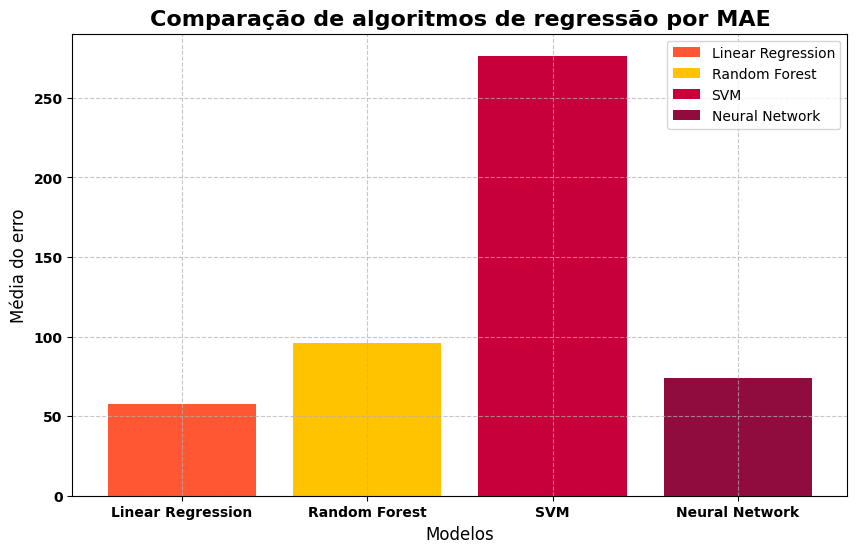

In [626]:
# Criação do gráfico para os resultados do MAE

models_names = ['Linear Regression', 'Random Forest', 'SVM', 'Neural Network'] # nome dos algoritmos
colors = ['#FF5733', '#FFC300', '#C70039', '#900C3F'] # cores das barras

plt.figure(figsize= (10, 6)) # criando figura
bars = plt.bar(models_names, mae_values, color= colors) # criando as barras
for bar, label in zip(bars, models_names): # adicionando todos os labels na legenda
    bar.set_label(label)

plt.title('Comparação de algoritmos de regressão por MAE', fontsize=16, fontweight='bold') # título
plt.xlabel('Modelos', fontsize=12) # legenda label X
plt.ylabel('Média do erro', fontsize=12) # legenda label Y
plt.xticks(fontsize=10, fontweight='bold')  # estilo dos ticks do eixo x
plt.yticks(fontsize=10, fontweight='bold')  # estilo dos ticks do eixo y
plt.legend(loc= 'upper right') # mudando apenas a localização
plt.grid(True, linestyle='--', alpha=0.7)  # adiciona grid com transparência
plt.show() # mostrando a figura